In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
position = pd.read_csv("positions.txt", delim_whitespace=True, index_col=0)

In [21]:
position

,x,y
star,,
1,746.58,459.64
2,547.57,493.95
3,462.38,523.01
4,230.97,347.20
5,112.45,420.52
...,...,...
2504,197.88,102.53
2505,813.48,940.59
2506,360.44,979.31


In [64]:
fwhm_2011 = pd.read_csv("2011_fwhm.txt", delim_whitespace=True, index_col=0)
fwhm_2012 = pd.read_csv("2012_fwhm.txt", delim_whitespace=True, index_col=0)
fwhm_2021 = pd.read_csv("2021_fwhm.txt", delim_whitespace=True, index_col=0)
fwhm_2022 = pd.read_csv("2022_fwhm.txt", delim_whitespace=True, index_col=0)

In [65]:
yearly_fwhm = {2011: fwhm_2011, 2012: fwhm_2012, 2021: fwhm_2021, 2022: fwhm_2022}

In [66]:
for year in yearly_fwhm:
    yearly_fwhm[year] = yearly_fwhm[year].merge(position, on="star", how="left")
    yearly_fwhm[year].to_csv(f"{year}_fwhm_with_position", sep="\t")

In [67]:
yearly_fwhm[2011]

,x_fwhm,y_fwhm,avg_fwhm,x,y
star,,,,,
1,4.1177,3.31570,3.31570,746.58,459.64
2,3.4497,2.91625,2.91625,547.57,493.95
3,3.3752,3.05780,3.05780,462.38,523.01
4,2.5518,2.56620,2.56620,230.97,347.20
5,2.7057,2.69190,2.69190,112.45,420.52
...,...,...,...,...,...
2504,6.7891,3.87420,3.87420,197.88,102.53
2505,7.7592,5.13400,5.13400,813.48,940.59
2506,5.1724,0.00000,0.00000,360.44,979.31


In [68]:
def make_chart(year, ys=("x_fwhm", "y_fwhm"), xs=("x",)):
    data = yearly_fwhm[year]
    data = data[(data["x_fwhm"] > 0) & (data["y_fwhm"] > 0)]
    data_stats = data.describe()
    
    for y in ys:
        for x in xs:
            data.plot(x=x, y=y, kind="scatter", title=f"{year}")
            data.plot(x=x, 
                      y=y, 
                      kind="scatter", 
                      title=f"{year} middle 50%", 
                      ylim=(data_stats[y]["25%"], data_stats[y]["75%"])
                     )

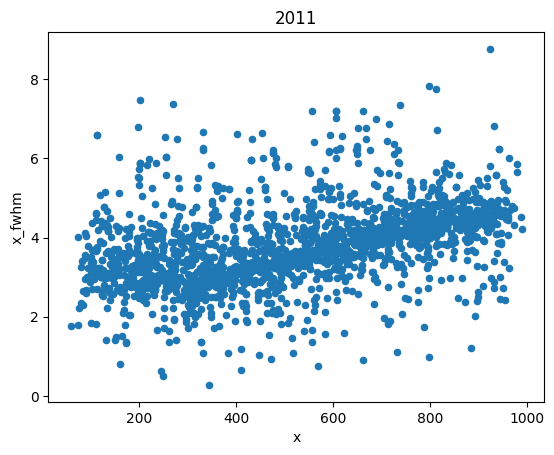

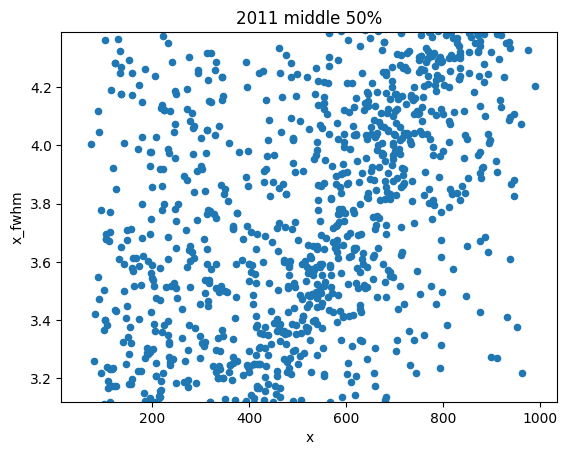

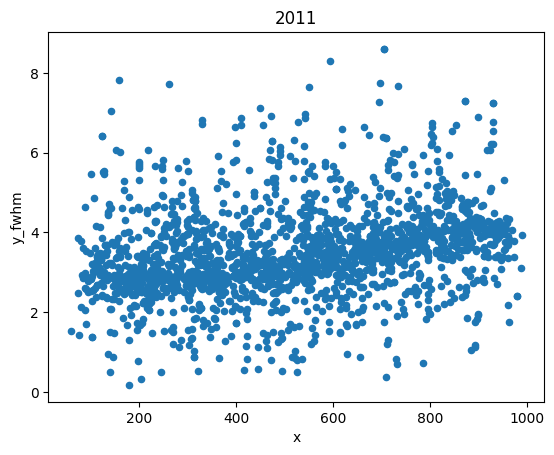

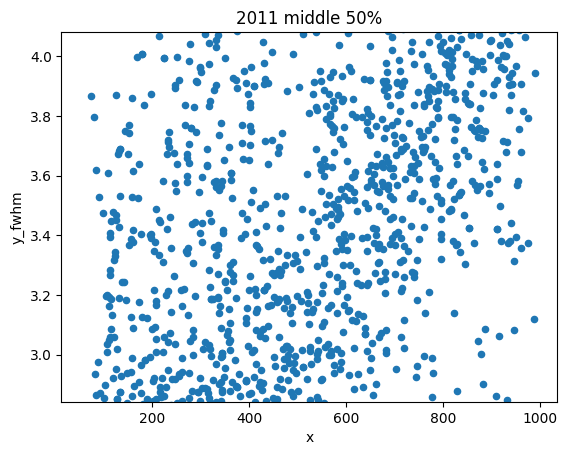

In [69]:
make_chart(2011)

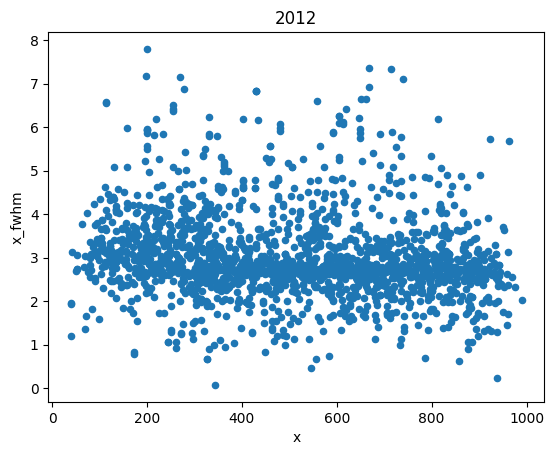

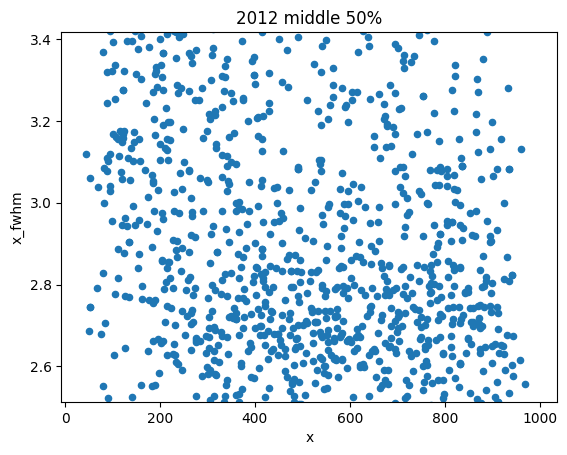

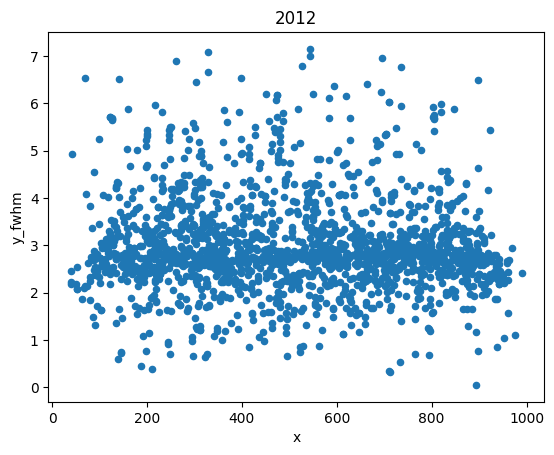

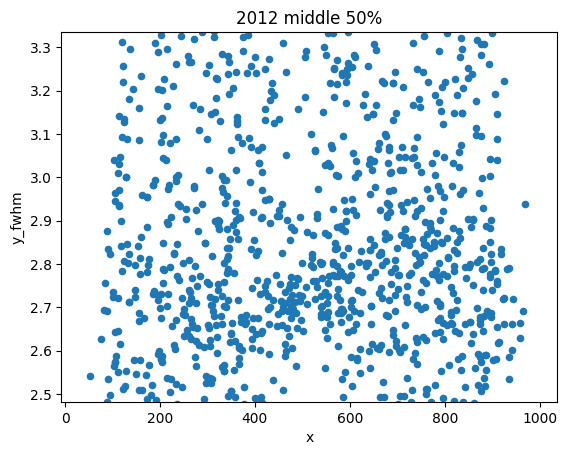

In [70]:
make_chart(2012)

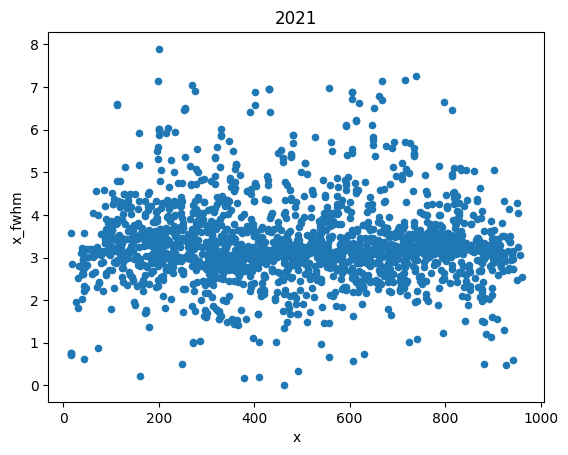

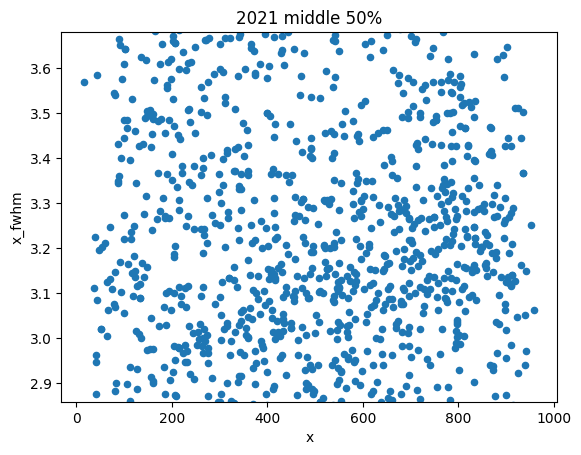

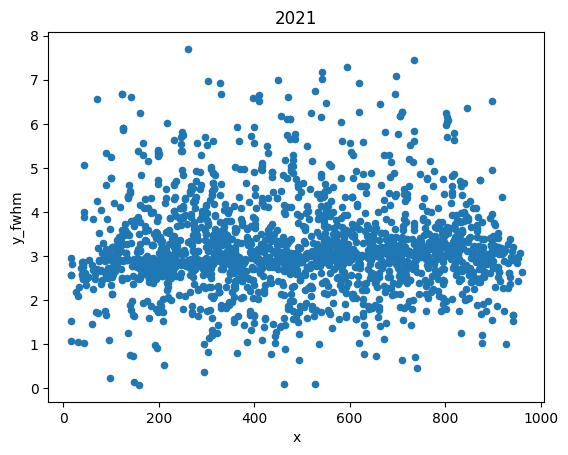

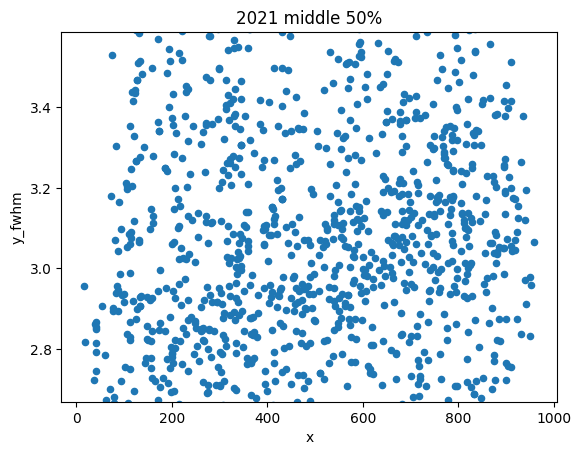

In [72]:
make_chart(2021)

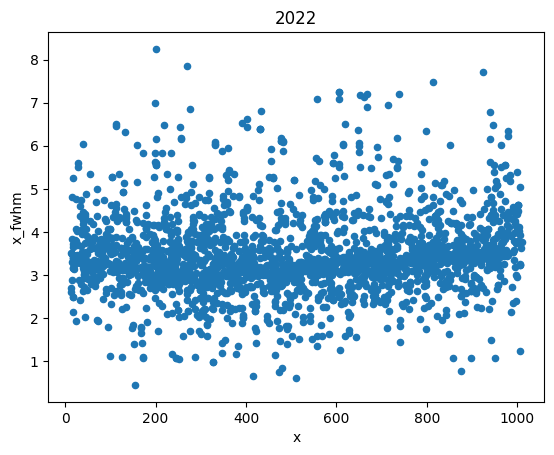

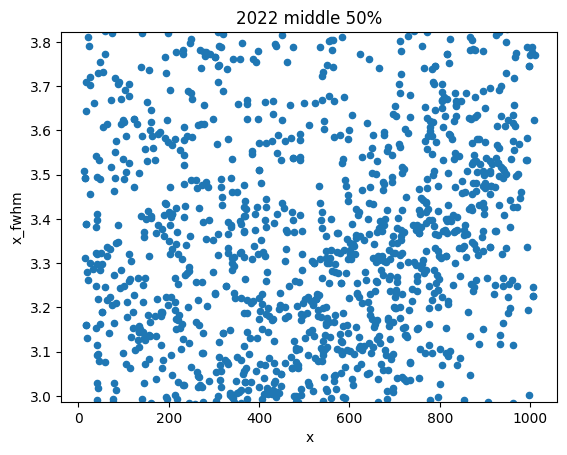

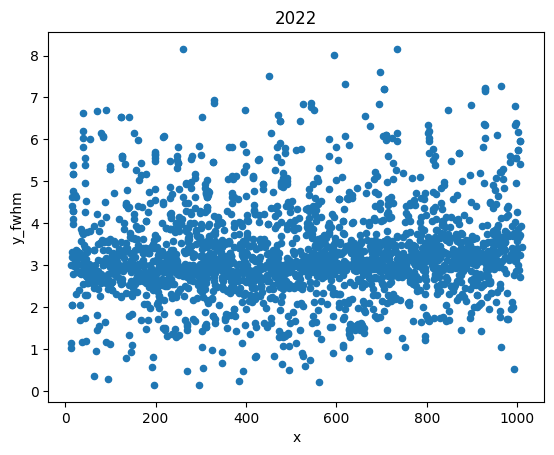

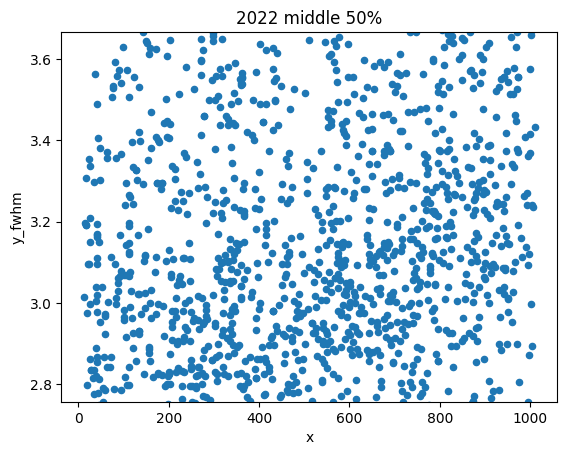

In [71]:
make_chart(2022)